In [27]:
# handling data
import pandas as pd
import numpy as np
import statsmodels.api as sm

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import chi2, SelectKBest, RFECV
from sklearn.linear_model import LinearRegression, LogisticRegression

# preprocessing
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer, LabelEncoder

# modelling & tuning
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report, accuracy_score, r2_score, confusion_matrix

# my custom functions
import projectfunctions as cf

In [3]:
# load data
data = pd.read_csv('loan_approval_dataset.csv')

# view first few lines
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.describe(include = 'all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# remove spaces
data = cf.strip_spaces(data)

In [7]:
# split data
train_df, test_df = train_test_split(data, test_size = 0.20, random_state = 2024)

In [8]:
# separate X and y variables
X_train = train_df.drop(columns = 'loan_status')
y_train = train_df['loan_status']
X_test = test_df.drop(columns = 'loan_status')
y_test = test_df['loan_status']

In [9]:
categorical_feats = ['no_of_dependents']
numeric_feats = ['income_annum', 'loan_amount', 
                 'loan_term', 'cibil_score', 
                 'residential_assets_value', 
                 'commercial_assets_value', 
                 'luxury_assets_value',
                 'bank_asset_value']
binary_feats = ['education', 'self_employed']

In [10]:
# Preprocessor for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor for categorical and binary features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feats),
        ('cat_bin', categorical_transformer, categorical_feats + binary_feats)
    ]
)


### Feature selection

In [11]:
# Fit and transform X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [12]:
# encode y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)

In [13]:
categorical_binary_feature_names = preprocessor.named_transformers_['cat_bin'].named_steps['onehot'].get_feature_names_out(categorical_feats + binary_feats)
feature_names = np.concatenate([numeric_feats, categorical_binary_feature_names])

In [14]:
results = []

# Numeric features
for feature in numeric_feats:
    X_feat = X_train[[feature]].values.reshape(-1, 1)
    model = LinearRegression().fit(X_feat, y_train_encoded)
    y_pred = model.predict(X_feat)
    r2 = r2_score(y_train_encoded, y_pred)
    results.append((feature, r2))

# Categorical and binary features
for feature in categorical_feats + binary_feats:
    X_feat = pd.get_dummies(X_train[[feature]], drop_first=True)
    model = LogisticRegression(max_iter=10000).fit(X_feat, y_train_encoded)
    y_pred = model.predict_proba(X_feat)[:, 1]
    r2 = r2_score(y_train_encoded, y_pred)
    results.append((feature, r2))

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Feature', 'R-Squared'])
results_df = results_df.sort_values(by='R-Squared', ascending=False)

print(results_df)


                     Feature     R-Squared
3                cibil_score  5.915466e-01
2                  loan_term  1.376116e-02
6        luxury_assets_value  9.026993e-04
0               income_annum  8.794297e-04
4   residential_assets_value  7.562035e-04
7           bank_asset_value  5.515291e-04
9                  education  1.240000e-04
8           no_of_dependents  9.888727e-05
5    commercial_assets_value  1.674260e-05
10             self_employed  1.159411e-05
1                loan_amount  9.289450e-08


#### Numerical feature selection

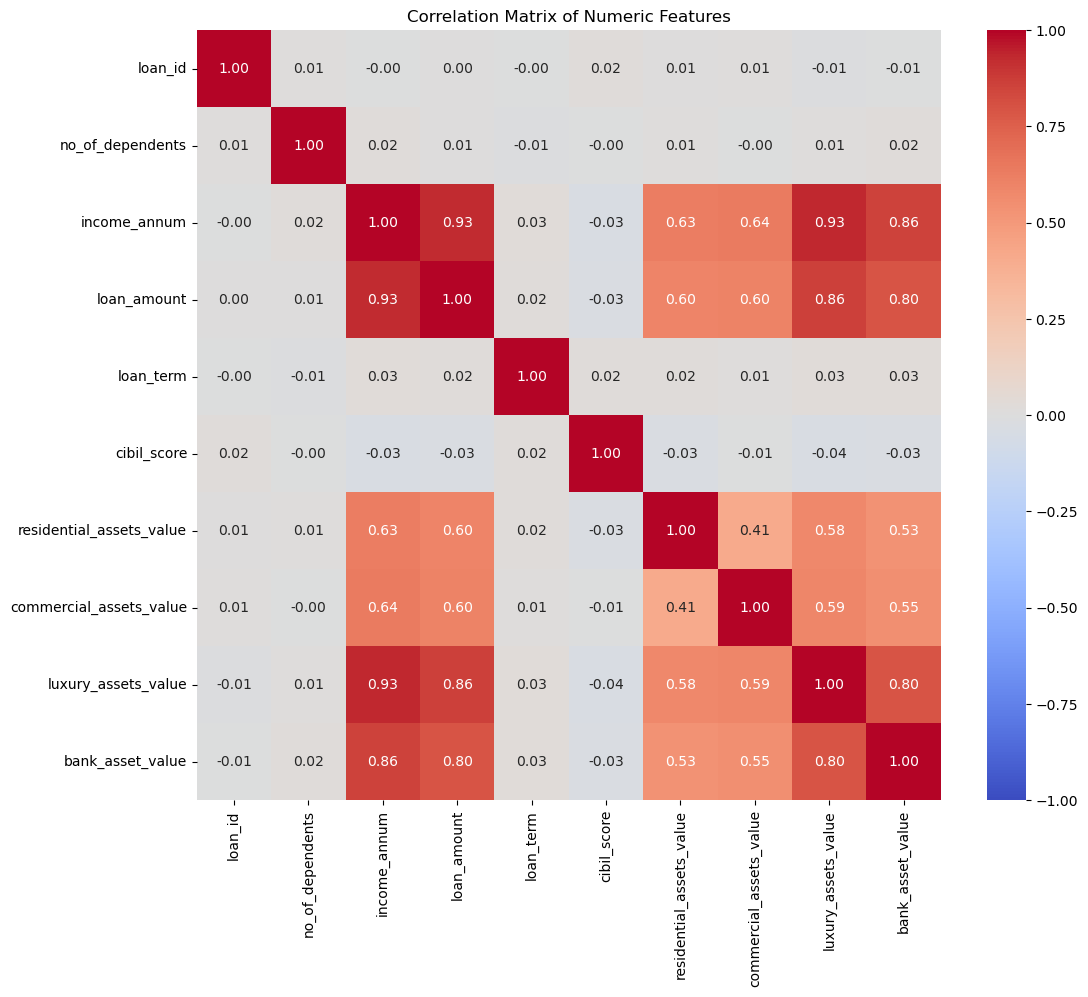

In [15]:
# Select only numeric columns
numeric_features = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix for all numeric features
corr = numeric_features.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Loan amount had the lowest R-squared. The correlation heatmap also indicates very high correlation between income and loan amount => drop

While luxury assets is higher on the R-squared list than income, there is high correlation between this feature and income => drop

Bank assets also has a high correlation with income => drop




#### Categorical feature selection

In [17]:
# Encoding categorical features
X_cat_encoded = pd.get_dummies(X_train[categorical_feats + binary_feats], drop_first=True)

# Applying the Chi-Square test
chi2_values, p_values = chi2(X_cat_encoded, y_train_encoded)

# Create a DataFrame with Chi-Square values
chi2_df = pd.DataFrame({'Feature': X_cat_encoded.columns, 
                        'Chi-Square': chi2_values,
                        'p-Value': p_values})

# Sort by Chi-Square values
chi2_df = chi2_df.sort_values(by='Chi-Square', ascending=False)

print(chi2_df)

                  Feature  Chi-Square   p-Value
0        no_of_dependents    0.386087  0.534363
1  education_Not Graduate    0.209441  0.647206
2       self_employed_Yes    0.019571  0.888741


After initially reviewing the plots for the categorical features, I suspected that they may not have much importance in predicting whether a loan is approved or rejected. 

The chi-squared values here suggest that there may be some dependence between the target and number of dependents as well as the target and education. The low chi-squared value for employment indicates that the employment feature and the target are independent.

The p-values for all three categorical features, being far above the 'usual' 0.05, indicate that none of categorical features are statistically significant.

Given these p-values, I will drop these categorical features.

### Dimension reduction, round 2

After removing the above named features, the accuracy of the models I tried didn't change much at all.

So I made another round of cuts, this time dropping residential and commercial assets.

* RBF SVM training accuracy decreased slightly, but validation accuracy also increased.
* kNN training accuracy improved, and diff between training and validation accuracy decreased a bit.
* Random Forest validation accuracy decreased, and still has the highest difference between training accuracy and validation accuracy, meaning the model overfits more than the others.
* Because the Rnadom Forest model has the highest validation scores, I will select it for use and tune hyperparameters to see how much it can be improved.

Hyperparameter tuning

In [18]:
rf_pipe = make_pipeline(preprocessor, RandomForestClassifier())

In [19]:
# Sweep over hyperparameters in rf_param_grid
rf_param_grid = {'randomforestclassifier__n_estimators': range(1, 301, 50),
                 'randomforestclassifier__max_depth': range(1, 31, 1),
                 'randomforestclassifier__min_samples_split': range(1, 10, 1)
                }

rf_search = RandomizedSearchCV(rf_pipe, 
                                  rf_param_grid, 
                                  cv = 5, 
                                  n_iter = 5,
                                  n_jobs = -1,
                                  return_train_score = True,
                                  random_state = 2023)


rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['income_annum',
                                                                                'loan_amount',
                                                                                'loan_term',
                                                                                'cibil_score',
                                                                                'residential_assets_value',
                                                                                'commercial_assets_value',
                                                                                'luxury_assets_value',
                                                                                'bank_asset_value'...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['no_of_dependents',
                                                                                'education',
                                                                                'self_employed'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': range(1, 31),
                                        'randomforestclassifier__min_samples_split': range(1, 10),
                                        'randomforestclassifier__n_estimators': range(1, 301, 50)},
                   random_state=2023, return_train_score=True)

In [20]:
rf_grid_results = rf_search.cv_results_
rf_grid_results = pd.DataFrame(rf_grid_results)
rf_grid_results = (rf_grid_results.loc[:,['mean_test_score',
                                          'param_randomforestclassifier__n_estimators',
                                          'param_randomforestclassifier__max_depth',
                                          'param_randomforestclassifier__min_samples_split',
                                          'mean_fit_time',
                                          'rank_test_score']]
                            .sort_values(by = 'rank_test_score'))     
rf_grid_results 

,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_split,mean_fit_time,rank_test_score
0,0.974817,151,16,8,1.449988,1
4,0.974231,251,10,5,2.046802,2
2,0.973939,201,9,4,1.832486,3
3,0.973646,251,13,8,2.188227,4
1,0.972767,51,29,9,0.538994,5


In [21]:
best_rf = rf_search.best_params_
best_rf_score = round(rf_search.best_score_, 4)

print(best_rf, best_rf_score)

{'randomforestclassifier__n_estimators': 151, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__max_depth': 16} 0.9748


### Model evaluation

In [22]:
rf_test_score = rf_search.score(X_test, y_test)
rf_test_score.round(4)

0.9778

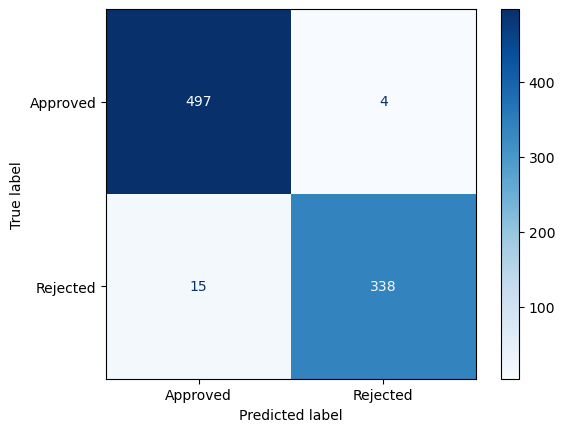

              precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       501
    Rejected       0.99      0.96      0.97       353

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [29]:
y_pred = rf_search.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

rf_cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Approved', 'Rejected'])

rf_cm_plot.plot(cmap = plt.cm.Blues)

plt.show()

print(classification_report(y_test, y_pred, target_names=['Approved', 'Rejected']))

### Discussion